**Beta Cell Metabolism: Tabula Muris**


This project **Clustering Pancreas from Tabula Muris** focuses on clustering dataset consisting of the pancreatic cells by using various scanpy functions related to data preprocessing, scaling , normalisation, visualisation, clustering and statistical testing.
<br>

**Insights into the dataset:**

The chosen dataset is taken from the Tabula Muris paper
<br>
https://www.nature.com/articles/s41586-018-0590-4
<br>
https://figshare.com/projects/Tabula_Muris_Transcriptomic_characterization_of_20_organs_and_tissues_from_Mus_musculus_at_single_cell_resolution/27733. 
<br>It consists of the Pancreatic Datasets obtained from the FACS(fluorescence-activated cell sorting) as well as the Droplet (microfluidic droplet method) Method. FACS and Droplet are the two methods for cell sorting. The data structure used is known as the AnnData which basically stands for "annotated data," and is the standard format used by the analysis library, Scanpy. 



In [6]:
from google.colab import drive #mount the drive to access the files 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#installing the libaries 
!pip install scanpy
!pip install jgraph

In [8]:
#importing the libaries required 
import pandas as pd #load in the pandas library for working with dataframes
import seaborn as sns #load in the python data visualization library 
import numpy as np #load in the numerical python library 
import scanpy as sc #load in the single-cell analysis library
import matplotlib.pyplot as plt #load in the visualisations
from jgraph import * #load in the graphs

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)


#These are the file paths from where the dataset will be accessed which can be modified as per user needs
FACS = sc.read_h5ad('./drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/data/TM_facs_mat.h5ad')
FACS_md = pd.read_csv('./drive/My Drive/Beta_Cell_Metabolism/Beta_Clustering/data/TM_facs_metadata.csv')

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.0.0
anndata             0.7.4
bottleneck          1.3.2
certifi             2020.06.20
cffi                1.14.2
chardet             3.0.4
cloudpickle         1.3.0
cycler              0.10.0
cython_runtime      NA
dask                2.12.0
dataclasses         NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
gi                  3.26.1
gio                 NA
glib                NA
gobject             NA
google              NA
gtk                 NA
h5py                2.10.0
idna                2.10
importlib_metadata  1.7.0
ipykernel           4.10.1
ipython_genutils    0.2.0
ipywidgets          7.5.1
jgraph              0.2.1
jinja2              2.11.2
joblib              0.16.0
jsonschema          2.6.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
llvmlite            0.31.0
markupsafe          1.1.1
matplotlib          3.2.2
mpl_toolkits        NA
natsort      

We are going to create the AnnData Object which consists of all the cells derieved from Tabula Muris and we will be finding important marker genes

In [9]:
FACS.obs = FACS_md #To create the AnnData Object and to inspect general info about the object FACS
FACS.obs

,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation
0,A1.B000126.3_39_F.1.1,B000126,3_39_F,Skin,Telogen,Multiple,F,facs,epidermal cell,CL:0000362,Intermediate IFE
1,A1.B000127.3_38_F.1.1,B000127,3_38_F,Fat,SCAT,Multiple,F,facs,endothelial cell,CL:0000115,NaN
2,A1.B000167.3_56_F.1.1,B000167,3_56_F,Mammary_Gland,Mammary_Gland,Multiple,F,facs,basal cell,CL:0000646,NaN
3,A1.B000168.3_57_F.1.1,B000168,3_57_F,Mammary_Gland,Mammary_Gland,Multiple,F,facs,NaN,NaN,NaN
4,A1.B000412.3_56_F.1.1,B000412,3_56_F,Heart,RA,Viable,F,facs,endothelial cell,CL:0000115,NaN
...,...,...,...,...,...,...,...,...,...,...,...
53755,P9.MAA001887.3_39_F.1.1,MAA001887,3_39_F,Marrow,KLS,Multiple,F,facs,Slamf1-negative multipotent progenitor cell,CL:0002035,NaN
53756,P9.MAA001888.3_39_F.1.1,MAA001888,3_39_F,Marrow,T-cells,Multiple,F,facs,regulatory T cell,CL:0000815,NaN
53757,P9.MAA001889.3_38_F.1.1,MAA001889,3_38_F,Lung,EPCAM,Multiple,F,facs,B cell,CL:0000236,NaN
53758,P9.MAA001892.3_38_F.1.1,MAA001892,3_38_F,Lung,Endomucin,Multiple,F,facs,lung endothelial cell,CL:1001567,NaN


The above table for FACS dataset denotes the annotations of the variables, i.e. the genes. The files has 11 columns: cell,	plate.barcode,mouse.id,	tissue,	subtissue,	FACS.selection,	mouse.sex,	method,	cell_ontology_class,	cell_ontology_id,	free_annotation

Now we will be creating a subset for only Tissue Pancreas from the Tabula Muris

In [10]:
pancreas = FACS[FACS.obs.tissue == 'Pancreas'] #To create a subset which contains only Tissue Pancreas
print (pancreas)
pancreas.obs #To inspect the key-indexed observations annotation (obs) of the dataset which contains only Pancreatic B cells

View of AnnData object with n_obs × n_vars = 1961 × 23433
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation'


,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation
84,A1.MAA000574.3_8_M.1.1,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,facs,NaN,NaN,NaN
115,A1.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell
150,A1.MAA001861.3_39_F.1.1,MAA001861,3_39_F,Pancreas,Exocrine,Viable,F,facs,NaN,NaN,NaN
151,A1.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell
154,A1.MAA001868.3_38_F.1.1,MAA001868,3_38_F,Pancreas,Exocrine,Viable,F,facs,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
53715,P9.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,NaN,NaN,NaN
53723,P9.MAA000910.3_10_M.1.1,MAA000910,3_10_M,Pancreas,Exocrine,Viable,M,facs,NaN,NaN,NaN
53744,P9.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell
53745,P9.MAA001861.3_39_F.1.1,MAA001861,3_39_F,Pancreas,Exocrine,Viable,F,facs,pancreatic acinar cell,CL:0002064,acinar cell


The above table for pancreas dataset denotes the annotations of the variables, i.e. the genes. The files has 11 columns: cell,	plate.barcode, mouse.id,	tissue,	subtissue,	FACS.selection, mouse.sex,	method,	cell_ontology_class,	cell_ontology_id,	free_annotation

We will be checking if pancreas has any null values 

In [11]:
type(pancreas.obs["cell_ontology_class"][84]), pancreas.obs["cell_ontology_class"][84] #To check if there are any null values in the dataset
pancreas.obs['cell_ontology_class'].isnull() #To inspect if all the null values have beeen removed 

84        True
115      False
150       True
151      False
154       True
         ...  
53715     True
53723     True
53744    False
53745    False
53748     True
Name: cell_ontology_class, Length: 1961, dtype: bool

In [12]:
pancreas.obs['cell_ontology_class'].isnull()

84        True
115      False
150       True
151      False
154       True
         ...  
53715     True
53723     True
53744    False
53745    False
53748     True
Name: cell_ontology_class, Length: 1961, dtype: bool

In [13]:
pancreas.obs.reset_index(inplace=True)

In [14]:
pancreas = pancreas[pancreas.obs['cell_ontology_class'].isnull()!=True,:]
pancreas.obs

,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation
115,A1.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell
151,A1.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell
292,A10.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell
321,A10.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell
438,A11.MAA000577.3_8_M.1.1,MAA000577,3_8_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell
...,...,...,...,...,...,...,...,...,...,...,...
53541,P8.MAA000910.3_10_M.1.1,MAA000910,3_10_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell
53567,P8.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell
53681,P9.MAA000574.3_8_M.1.1,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell
53744,P9.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell


The above table for pancreas dataset denotes the annotations of the variables, i.e. the genes. The files has 11 columns:cell,	plate.barcode,	mouse.id,	tissue,	subtissue,	FACS.selection,	mouse.sex,	method,	cell_ontology_class,	cell_ontology_id,	free_annotation
<br>


In [15]:
pancreas

View of AnnData object with n_obs × n_vars = 1564 × 23433
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation'

**BASIC PREPROCESSING** 
<br>
Since our dataset consists of many poor quality cells and has batch effects from random genes. We will process the data in the following way
 
 Preprocessing consists of the following:
 <br>
 1)Filtering of low-quality cells 
 <br>
 2)Quality control
 <br>
 3)Normalization 
<br>
4)Selection of features
<br>
5)Scaling the data
<br>
6)Dimensionality reduction

In [16]:
sc.pp.filter_genes(pancreas, min_cells=5) #This function removes the genes based on the number of cells or counts (here number is set to 5)
sc.pp.filter_cells(pancreas, min_genes=500) #This function removes the cell outliers based on counts and numbers of genes expressed  (here number is set to 500)

filtered out 6348 genes that are detected in less than 5 cells


Trying to set attribute `.var` of view, copying.
/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


The dataset contains alot of non-biological factors which can get expressed instead of the important genes and hence give inaccurate results and hence the below code is to remove the spike-ins called 'ERCC' from the pancreas.var which denotes the variables (gene) 

In [17]:
is_spike_in = {}
number_of_spike_ins = 0

for gene_name in pancreas.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True # record that we found a spike-in
        number_of_spike_ins += 1 # bump the counter
    else:
        is_spike_in[gene_name] = False # record that this was not a spike-in
        
pancreas.var['ERCC'] = pd.Series(is_spike_in) # because the index of adata.var and the keys of is_spike_in match, anndata will take care of matching them up
print('found this many spike ins: ', number_of_spike_ins)

found this many spike ins:  61


In [18]:
pancreas.var['ERCC'] = pancreas.var_names.str.startswith('ERCC-')  # annotate the group of ERCC genes as 'ERCC'
sc.pp.calculate_qc_metrics(pancreas, qc_vars=['ERCC'], percent_top=None, log1p=False, inplace=True)

In [19]:
pancreas.var  #To inspect the Key-indexed annotation of variables/features (var) of the dataset created 

,n_cells,ERCC,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
index,,,,,,
0610005C13Rik,21,False,21,0.200767,98.657289,314.0
0610007C21Rik,1248,False,1248,247.942459,20.204604,387782.0
0610007L01Rik,1037,False,1037,104.419434,33.695652,163312.0
0610007N19Rik,537,False,537,18.648338,65.664962,29166.0
0610007P08Rik,498,False,498,26.544117,68.158568,41515.0
...,...,...,...,...,...,...
Zyx,460,False,460,29.368286,70.588235,45932.0
Zzef1,824,False,824,47.480820,47.314578,74260.0
Zzz3,777,False,777,43.565216,50.319693,68136.0


The above table for pancreas dataset denotes the annotations of the variables, i.e. the genes. The files now has 6 columns: n_cells,	ERCC,	n_cells_by_counts,mean_counts,	pct_dropout_by_counts,	total_counts

*We will be complelely getting rid of the spikes-in 'ERCC' using the following code*

In [20]:
idx2 = [] #ERCC is completely removed
for i in range(len(pancreas.var.index)):
  if "ERCC" in pancreas.var.index[i]:
    idx2.append(pancreas.var.index[i])
    print(pancreas.var.index[i])

ERCC-00002
ERCC-00003
ERCC-00004
ERCC-00009
ERCC-00014
ERCC-00019
ERCC-00022
ERCC-00025
ERCC-00028
ERCC-00031
ERCC-00033
ERCC-00034
ERCC-00035
ERCC-00039
ERCC-00042
ERCC-00043
ERCC-00044
ERCC-00046
ERCC-00051
ERCC-00053
ERCC-00054
ERCC-00058
ERCC-00059
ERCC-00060
ERCC-00062
ERCC-00067
ERCC-00071
ERCC-00074
ERCC-00076
ERCC-00077
ERCC-00078
ERCC-00079
ERCC-00084
ERCC-00085
ERCC-00092
ERCC-00095
ERCC-00096
ERCC-00099
ERCC-00108
ERCC-00111
ERCC-00112
ERCC-00113
ERCC-00116
ERCC-00126
ERCC-00130
ERCC-00131
ERCC-00136
ERCC-00143
ERCC-00144
ERCC-00145
ERCC-00147
ERCC-00148
ERCC-00150
ERCC-00154
ERCC-00157
ERCC-00160
ERCC-00162
ERCC-00163
ERCC-00165
ERCC-00170
ERCC-00171


In [21]:
pancreas.var.drop(index = idx2, inplace=True)

In [22]:
for i in range(len(pancreas.var.index)):
  if "ERCC" in pancreas.var.index[i]:
    print(pancreas.var.index[i])

In [23]:
pancreas

AnnData object with n_obs × n_vars = 1564 × 17085
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

... storing 'plate.barcode' as categorical
... storing 'mouse.id' as categorical
... storing 'tissue' as categorical
... storing 'subtissue' as categorical
... storing 'FACS.selection' as categorical
... storing 'mouse.sex' as categorical
... storing 'method' as categorical
... storing 'cell_ontology_class' as categorical
... storing 'cell_ontology_id' as categorical
... storing 'free_annotation' as categorical


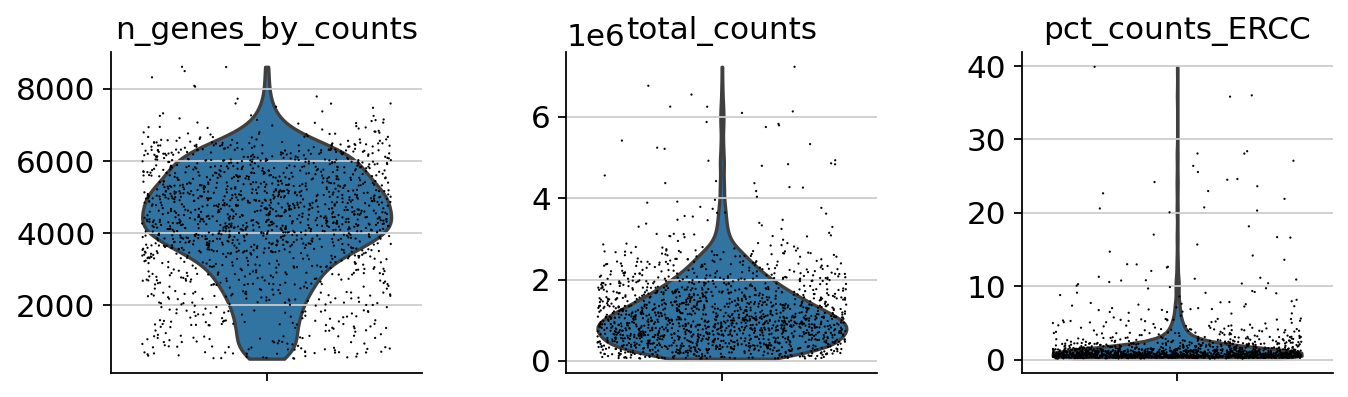

In [24]:
sc.pl.violin(pancreas, ['n_genes_by_counts', 'total_counts', 'pct_counts_ERCC'],
             jitter=0.4, multi_panel=True) #Plotted violin plot for the the quality metrics [n_genes_by_counts, total_counts, pct_counts_ERCC]

The violin plot n_genes_by_count shows that the number of genes expressed in the cell count matrix. The genes are concentrated in the range of 0-8000
<br>
The violin plot total_count shows the total counts per cell which lies in the range of 0-15000 
<br>
The violin plot pct_counts_ERCC shows the total number of counts in ERCC genes which lies in the range of 0-10

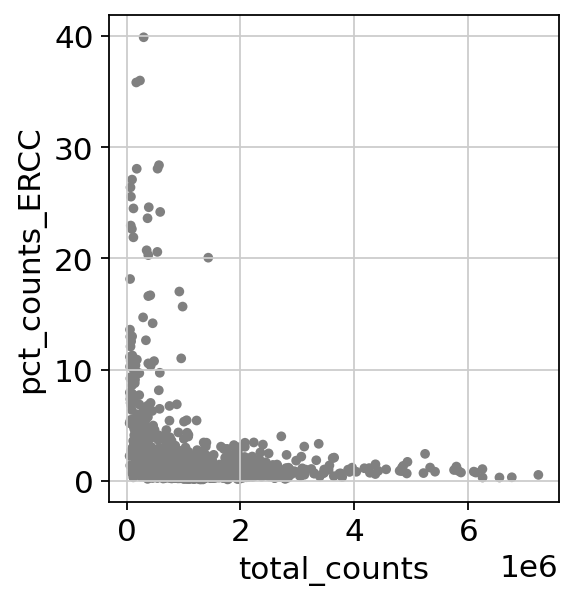

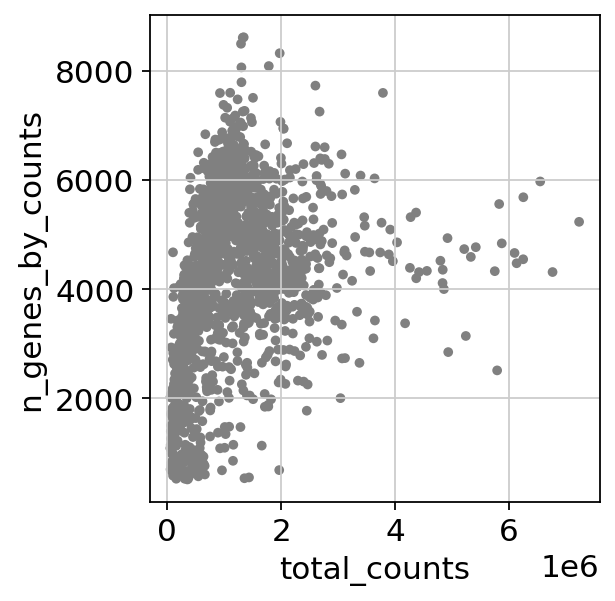

In [25]:
sc.pl.scatter(pancreas, x='total_counts', y='pct_counts_ERCC') #Plotting a scatter plot for total_counts vs pct_counts_ERCC
sc.pl.scatter(pancreas, x='total_counts', y='n_genes_by_counts')  #Plotting a scatter plot for total_counts vs n_genes_by_counts

**Filtering** 

In [26]:
#removing the cells in which number of genes per cell has a count of less than 8000 genes per cell
pancreas_filtered = pancreas[pancreas.obs.n_genes_by_counts < 8000, :] #creation of the filtered dataset

In [27]:
pancreas_filtered #To inspect general info about the filtered object pancreas

View of AnnData object with n_obs × n_vars = 1558 × 17024
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

The processed pancreas data contains the following
<br>
There are 1558 observations which are the number of cells (n_obs)
<br>
There are 17024 variables which denotes the genes (n_var)

In [28]:
pancreas_filtered.obs

,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation,n_genes,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC
115,A1.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell,4270,4270,644255.0,5383.0,0.835539
151,A1.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,5914,5914,815377.0,3892.0,0.477325
292,A10.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,4758,4758,647471.0,4326.0,0.668138
321,A10.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,4989,4989,1172653.0,9549.0,0.814307
438,A11.MAA000577.3_8_M.1.1,MAA000577,3_8_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell,3764,3764,1706283.0,15487.0,0.907645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53541,P8.MAA000910.3_10_M.1.1,MAA000910,3_10_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell,1808,1808,395791.0,25856.0,6.532741
53567,P8.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,5936,5936,1548000.0,8818.0,0.569638
53681,P9.MAA000574.3_8_M.1.1,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell,600,600,328084.0,16701.0,5.090465
53744,P9.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,2306,2306,361470.0,14348.0,3.969347


In [29]:
pancreas_filtered  #To inspect the key-indexed observations annotation (obs) of the filtered dataset

View of AnnData object with n_obs × n_vars = 1558 × 17024
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [30]:
pancreas_filtered.write('/content/drive/My Drive/Beta_Cell_Metabolism/Pancreas_Clustering/Pancreas_filtered.h5ad') #save the filtered file

**Normalisation**

In [31]:
pancreas_filtered.obs #To inspect the key-indexed observations annotation (obs) of the filtered dataset

,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation,n_genes,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC
115,A1.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell,4270,4270,644255.0,5383.0,0.835539
151,A1.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,5914,5914,815377.0,3892.0,0.477325
292,A10.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,4758,4758,647471.0,4326.0,0.668138
321,A10.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,4989,4989,1172653.0,9549.0,0.814307
438,A11.MAA000577.3_8_M.1.1,MAA000577,3_8_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell,3764,3764,1706283.0,15487.0,0.907645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53541,P8.MAA000910.3_10_M.1.1,MAA000910,3_10_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell,1808,1808,395791.0,25856.0,6.532741
53567,P8.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,5936,5936,1548000.0,8818.0,0.569638
53681,P9.MAA000574.3_8_M.1.1,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell,600,600,328084.0,16701.0,5.090465
53744,P9.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,2306,2306,361470.0,14348.0,3.969347


The above table for pancreas dataset denotes the annotations of the variables, i.e. the genes. The files has 16 columns: cell,	plate.barcode,	mouse.id,	tissue,	subtissue,	FACS.selection,	mouse.sex	method, cell_ontology_class,	cell_ontology_id, free_annotation,	n_genes,	n_genes_by_counts, total_counts,	total_counts_ERCC,	pct_counts_ERCC

In [32]:
pancreas_filtered #To inspect general info about the filtered object 

View of AnnData object with n_obs × n_vars = 1558 × 17024
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [33]:
not_Rn45s = pancreas_filtered.var.index != 'Rn45s' #Removing Rn45s as it is an offending gene
pancreas_normalize = pancreas_filtered[:, not_Rn45s] #creating a variable pancreas_normalize which does not contain the gene Rns45s

In [34]:
pancreas_normalize.var #To inspect the Key-indexed annotation of variables/features (var) of the dataset created

,n_cells,ERCC,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
index,,,,,,
0610005C13Rik,21,False,21,0.200767,98.657289,314.0
0610007C21Rik,1248,False,1248,247.942459,20.204604,387782.0
0610007L01Rik,1037,False,1037,104.419434,33.695652,163312.0
0610007N19Rik,537,False,537,18.648338,65.664962,29166.0
0610007P08Rik,498,False,498,26.544117,68.158568,41515.0
...,...,...,...,...,...,...
Zyx,460,False,460,29.368286,70.588235,45932.0
Zzef1,824,False,824,47.480820,47.314578,74260.0
Zzz3,777,False,777,43.565216,50.319693,68136.0


The above table for pancreas dataset denotes the annotations of the variables, i.e. the genes. The files has 6 columns:n_cells,	ERCC,	n_cells_by_counts,	mean_counts,	pct_dropout_by_counts,	total_counts

In [35]:
pancreas_normalize #To inspect general info about the normalized object pancreas_normalize

View of AnnData object with n_obs × n_vars = 1558 × 17023
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

The processed pancreas data contains 
<br>
There are 1558 observations which are the number of cells (n_obs)
<br>
There are 17023 variables which denotes the genes (n_var)

In [36]:
sc.pp.normalize_total(pancreas_normalize, target_sum=1e4) #Normalize counts per cell, reduce the dataset from X to 10,000 reads per cells so that counts become comparable to the cells

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [37]:
sc.pp.log1p(pancreas_normalize) #Logarithmize the data

In [38]:
pancreas_normalize.write('/content/drive/My Drive/Beta_Cell_Metabolism/Pancreas_Clustering/pancreas_normalized.h5ad')  #save the normalized file

Selection of Features

In [39]:
pancreas_normalize = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Pancreas_Clustering/pancreas_normalized.h5ad') #read the normalized file

In [40]:
pancreas_normalize

AnnData object with n_obs × n_vars = 1558 × 17023
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [41]:
pancreas_normalize.obs #To inspect general info about the normalized object pancreas_normalize

,cell,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,method,cell_ontology_class,cell_ontology_id,free_annotation,n_genes,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC
115,A1.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell,4270,4270,644255.0,5383.0,0.835539
151,A1.MAA001862.3_39_F.1.1,MAA001862,3_39_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,5914,5914,815377.0,3892.0,0.477325
292,A10.MAA000884.3_10_M.1.1,MAA000884,3_10_M,Pancreas,Endocrine,Viable,M,facs,type B pancreatic cell,CL:0000169,beta cell,4758,4758,647471.0,4326.0,0.668138
321,A10.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,4989,4989,1172653.0,9549.0,0.814307
438,A11.MAA000577.3_8_M.1.1,MAA000577,3_8_M,Pancreas,Endocrine,Viable,M,facs,pancreatic A cell,CL:0000171,pancreatic A cell,3764,3764,1706283.0,15487.0,0.907645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53541,P8.MAA000910.3_10_M.1.1,MAA000910,3_10_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell,1808,1808,395791.0,25856.0,6.532741
53567,P8.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,5936,5936,1548000.0,8818.0,0.569638
53681,P9.MAA000574.3_8_M.1.1,MAA000574,3_8_M,Pancreas,Exocrine,Viable,M,facs,pancreatic acinar cell,CL:0002064,acinar cell,600,600,328084.0,16701.0,5.090465
53744,P9.MAA001857.3_38_F.1.1,MAA001857,3_38_F,Pancreas,Endocrine,Viable,F,facs,pancreatic A cell,CL:0000171,pancreatic A cell,2306,2306,361470.0,14348.0,3.969347


normalizing counts per cell
    finished (0:00:00)


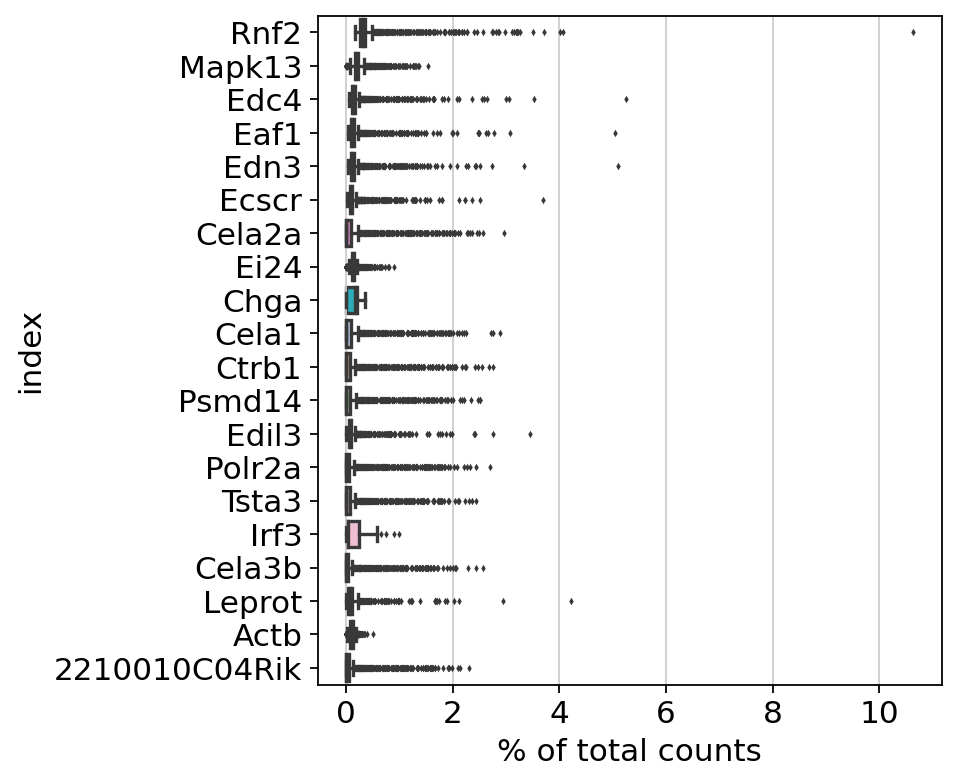

In [42]:
sc.pl.highest_expr_genes(pancreas_normalize, n_top=20 )  #Annotate highly variable genes

The top three genes are Rnf2, Mapk13, Edc4

In [43]:
sc.pp.highly_variable_genes(pancreas_normalize, min_mean=0.0125, max_mean=3, min_disp=0.5) #identify the highly variable genes and we will keep the dataset which will contain only the highly variable genes 

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


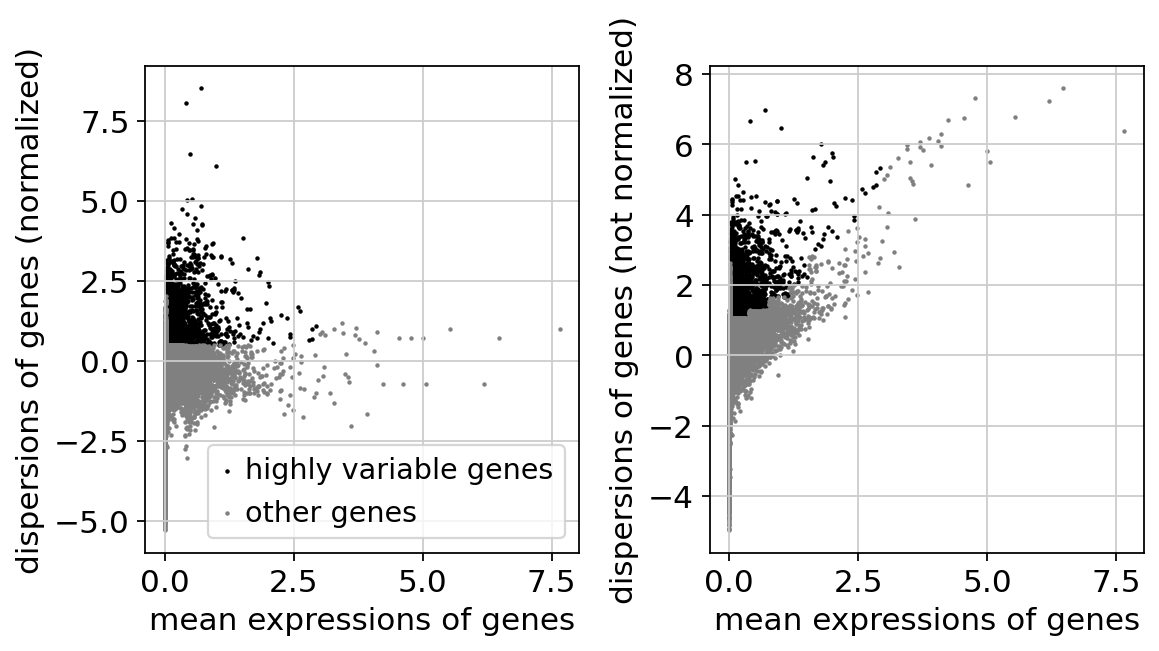

In [44]:
sc.pl.highly_variable_genes(pancreas_normalize) #scatter plot of the highly variable genes dataset

In [45]:
pancreas_normalize #To inspect general info about the object

AnnData object with n_obs × n_vars = 1558 × 17023
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

There are 17,023 genes as before

In [46]:
pancreas_normalize = pancreas_normalize[:, pancreas_normalize.var.highly_variable] #choosing highly variable genes

In [47]:
pancreas_normalize #To inspect general info about the normalized object B which has highly variable genes

View of AnnData object with n_obs × n_vars = 1558 × 3827
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

Now the processed, normalised, highly variable gene pancreas contains 1558 observations which are the number of cells and 3827 variables which denotes the genes. We will scale the dataset to ensure that the highly expressed genes dont dominate 

**Scaling of the data** 
we will scale our data to unit variance and zero mean

In [48]:
pancreas_normalize #To inspect general info about the normalized object B which has highly variable genes 

View of AnnData object with n_obs × n_vars = 1558 × 3827
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

In [49]:
sc.pp.regress_out(pancreas_normalize, ['total_counts', 'pct_counts_ERCC'])  #To regress out effects of total counts per cell 

regressing out ['total_counts', 'pct_counts_ERCC']
    sparse input is densified and may lead to high memory use
    finished (0:00:12)


In [50]:
sc.pp.scale(pancreas_normalize, max_value=10) #Again scale the dataset to unit variance

In [51]:
pancreas_normalize.obs.cell_ontology_class #To inspect the cell ontology class

115           pancreatic A cell
151           pancreatic A cell
292      type B pancreatic cell
321           pancreatic A cell
438           pancreatic A cell
                  ...          
53541    pancreatic acinar cell
53567         pancreatic A cell
53681    pancreatic acinar cell
53744         pancreatic A cell
53745    pancreatic acinar cell
Name: cell_ontology_class, Length: 1558, dtype: category
Categories (9, object): [endothelial cell, leukocyte, pancreatic A cell, pancreatic D cell, ...,
                         pancreatic acinar cell, pancreatic ductal cell, pancreatic stellate cell,
                         type B pancreatic cell]

As we can see that there are 9 categories of the cell ontology class: Pancreas which have only Highly variable genes *HVG after scaling

**DIMENSIONALITY REDUCTION**
<br>
Dimensionality reduction is a process which helps to identify similar transcriptomic profiles in which each gene represents a dimension of the data.  It takes a large set of variables and returns a smaller set of components which retains most of the information in the original dataset. 

**Principal Component Analysis**
<br>
Principal Component Analysis is a dimensionality reduction technique in which the correlated variables club into the uncorrelated variables called Principal Components (PCs)

In [52]:
pancreas_normalize #To inspect general info about the normalized object B which has highly variable genes

AnnData object with n_obs × n_vars = 1558 × 3827
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg'

In [53]:
sc.tl.pca(pancreas_normalize, svd_solver='arpack', n_comps=50) #To reduce the dimensionality of the dataset B by running PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


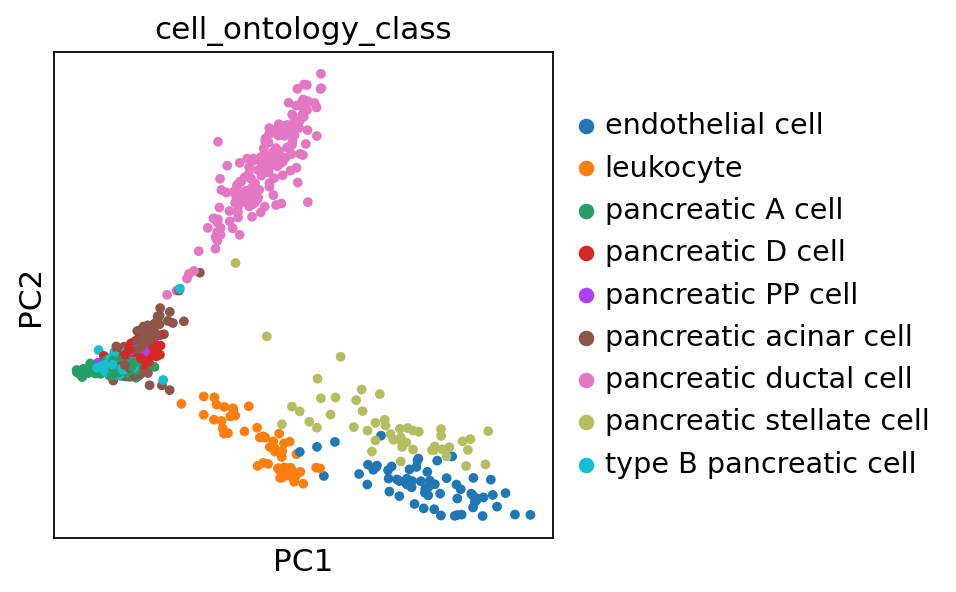

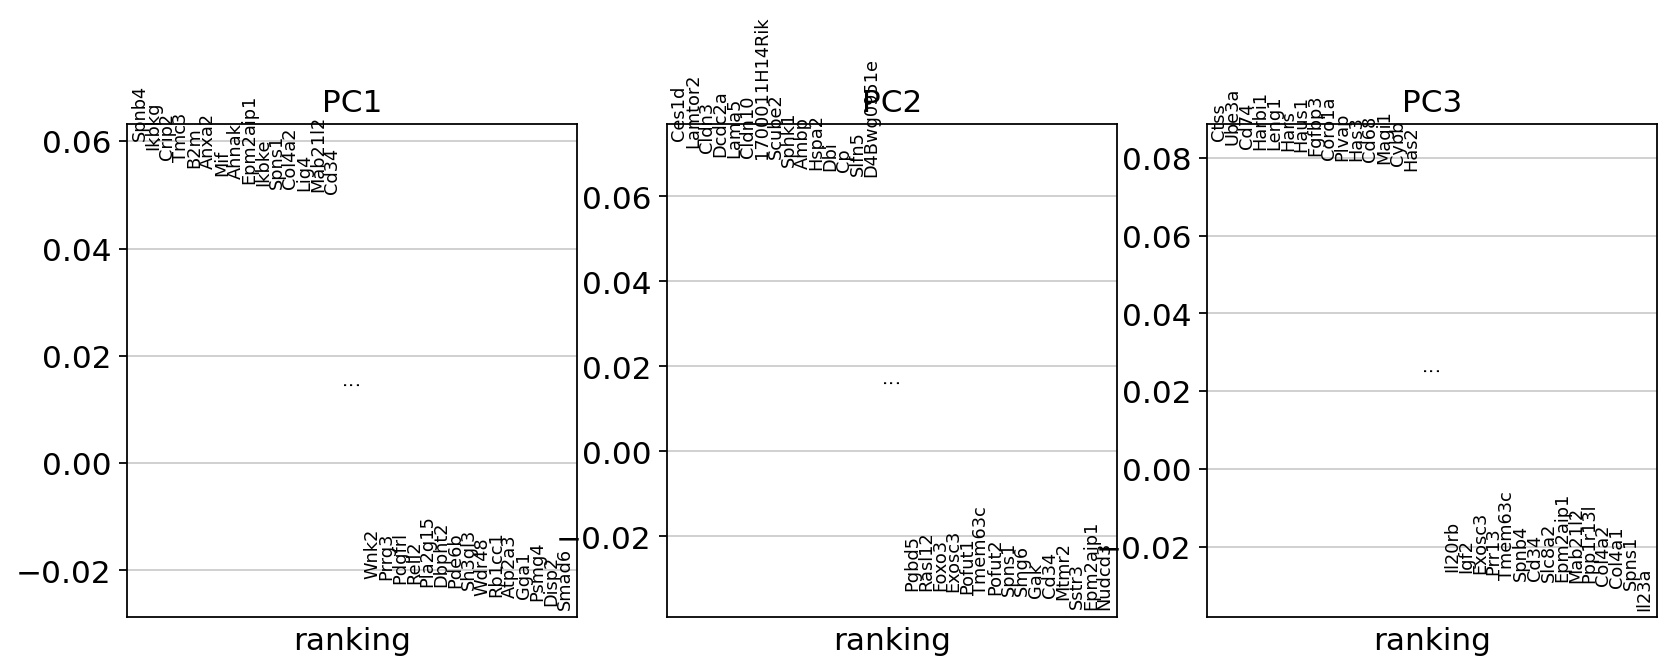

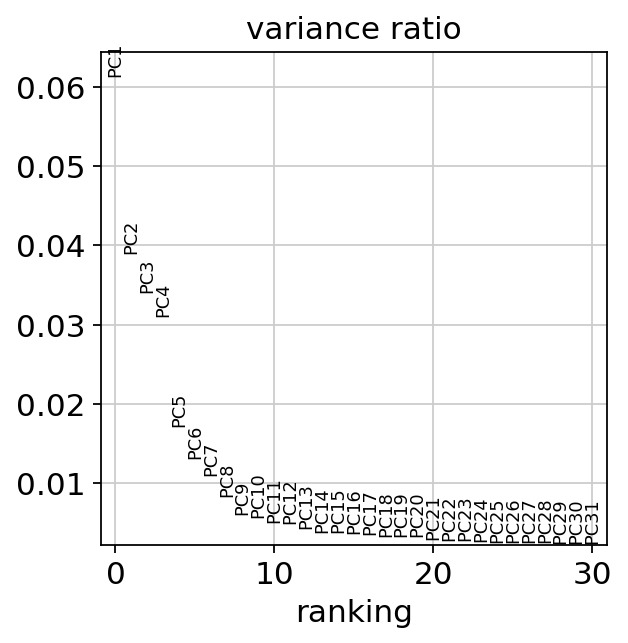

In [54]:
sc.pl.pca_overview(pancreas_normalize, color='cell_ontology_class') #scatter plot of PC1 vs PC2 for the cell ontology class

PCA above depicts PC1 vs PC2 in cell ontology class. The variance ratio graph shows explained variance of PCA dimensions

**Determination of the number of PCs to keep**

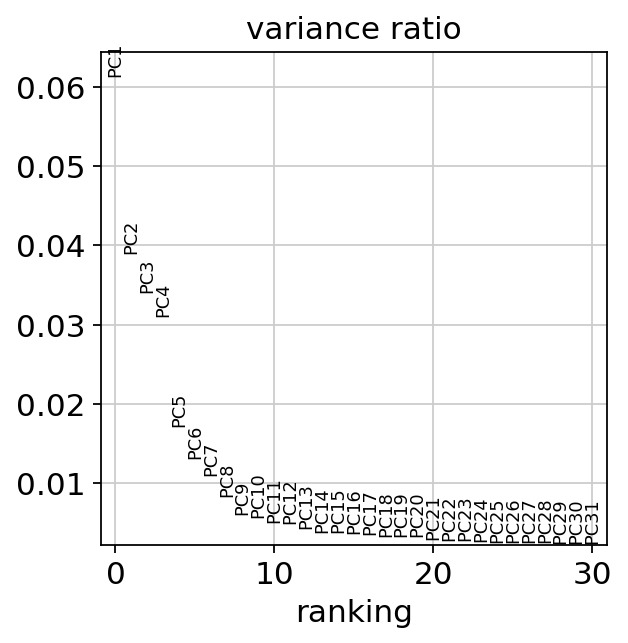

In [55]:
sc.pl.pca_variance_ratio(pancreas_normalize) #Determination of the number of PCs to keep

We will keep 9 PCs

In [56]:
pancreas_normalize.write('/content/drive/My Drive/Beta_Cell_Metabolism/Pancreas_Clustering/pancreas_PCA.h5ad') #save the PCA file 

**CLUSTERING**

**CLUSTERING OF CELLS:**
<br>
To identify the cell types and states and as well as find differences between different groups, we group the cells in the process called clustering.  We can define the group of cells with similar expression profiles using unsupervised clustering.

In [57]:
pancreas_cluster = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Pancreas_Clustering/pancreas_PCA.h5ad')#read the PCA file

In [58]:
pancreas_cluster #To inspect general info about the normalized object B which has highly variable genes after PCA

AnnData object with n_obs × n_vars = 1558 × 3827
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

The pancreas after HVG, after scaling and PCA

**Computation of the neighbourhood graph**

In [59]:
sc.pp.neighbors(pancreas_cluster, n_neighbors=10, n_pcs=10) #To compute the neighbours

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [60]:
pancreas_cluster.uns #To inspect the unstructured annotation

OverloadedDict, wrapping:
	{'cell_ontology_class_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf'], dtype=object), 'hvg': {'flavor': 'seurat'}, 'pca': {'params': {'use_highly_variable': True, 'zero_center': True}, 'variance': array([208.093    , 132.24995  , 115.4615   , 105.242905 ,  58.01493  ,
        44.504253 ,  36.914837 ,  27.97485  ,  20.400467 ,  18.99619  ,
        16.998999 ,  16.409517 ,  14.409354 ,  12.808976 ,  12.515507 ,
        12.059767 ,  11.9560795,  11.096762 ,  10.880158 ,  10.747057 ,
         9.548931 ,   9.396814 ,   9.057738 ,   8.718448 ,   8.542538 ,
         8.447318 ,   8.247047 ,   8.1818695,   8.131414 ,   7.9853897,
         7.8428874,   7.7923665,   7.604607 ,   7.470524 ,   7.3747115,
         7.331015 ,   7.256247 ,   7.2188926,   7.1488147,   7.0754423,
         7.053727 ,   6.981272 ,   6.921394 ,   6.849456 ,   6.836735 ,
         6.758536 ,   6.7391624,   6.698559 ,   6.6688

In [61]:
sc.tl.umap (pancreas_cluster)  #To compute the neighbourhood graph using UMAP

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


In [62]:
pancreas_cluster #creates X_umap Column

AnnData object with n_obs × n_vars = 1558 × 3827
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

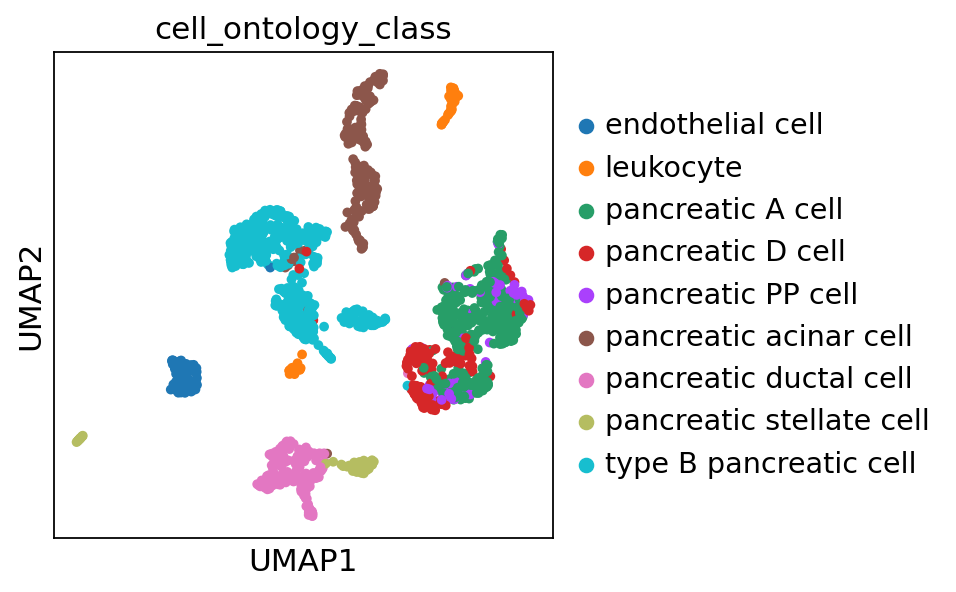

In [63]:
sc.pl.umap(pancreas_cluster, color=['cell_ontology_class']) #To plot the neighborhood graph so that we can place similiar cells together

**Clustering the neighbourhood graph**
<br>
Clustering of the neighbourhood graph by Leiden

In [64]:
#installing and importing the library louvain for finding the clusters
!pip3 install louvain
import louvain 

     |████████████████████████████████| 2.2MB 2.6MB/s 
     |████████████████████████████████| 3.2MB 19.5MB/s 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
sc.tl.louvain(pancreas_cluster, resolution=0.1)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


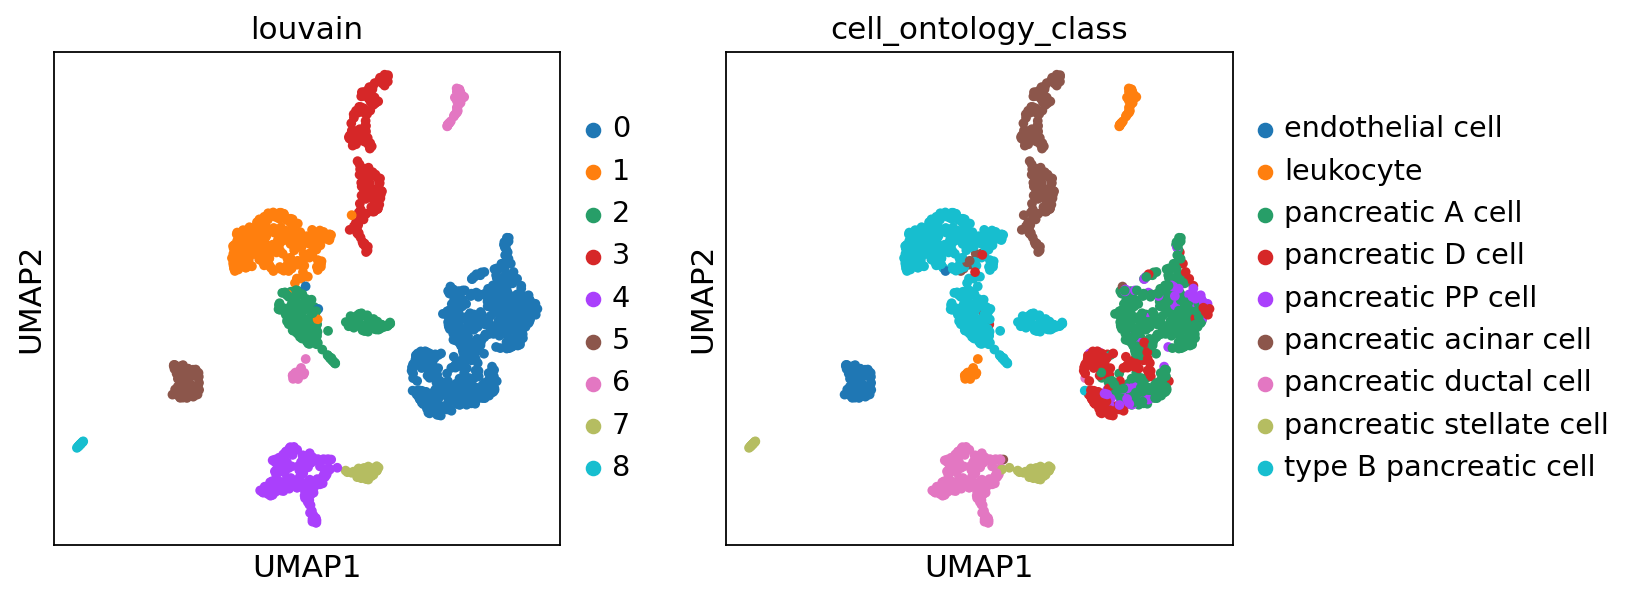

In [66]:
sc.pl.umap (pancreas_cluster, color=['louvain','cell_ontology_class'])

The louvain clustering produces 9 clusters

In [67]:
pancreas_cluster.write('/content/drive/My Drive/Beta_Cell_Metabolism/Pancreas_Clustering/Pancreas_Clustering.h5ad')

FINDING MARKER GENES

In [68]:
pancreas_cluster = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Pancreas_Clustering/Pancreas_Clustering.h5ad') #save the clustering file 

In [69]:
pancreas_cluster #To inspect the general info about the object

AnnData object with n_obs × n_vars = 1558 × 3827
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'louvain'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'hvg', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Wilcoxon Rank Sum Test 
<br> This test is used to find the marker genes 

In [70]:
pancreas_cluster = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Pancreas_Clustering/Pancreas_Clustering.h5ad')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


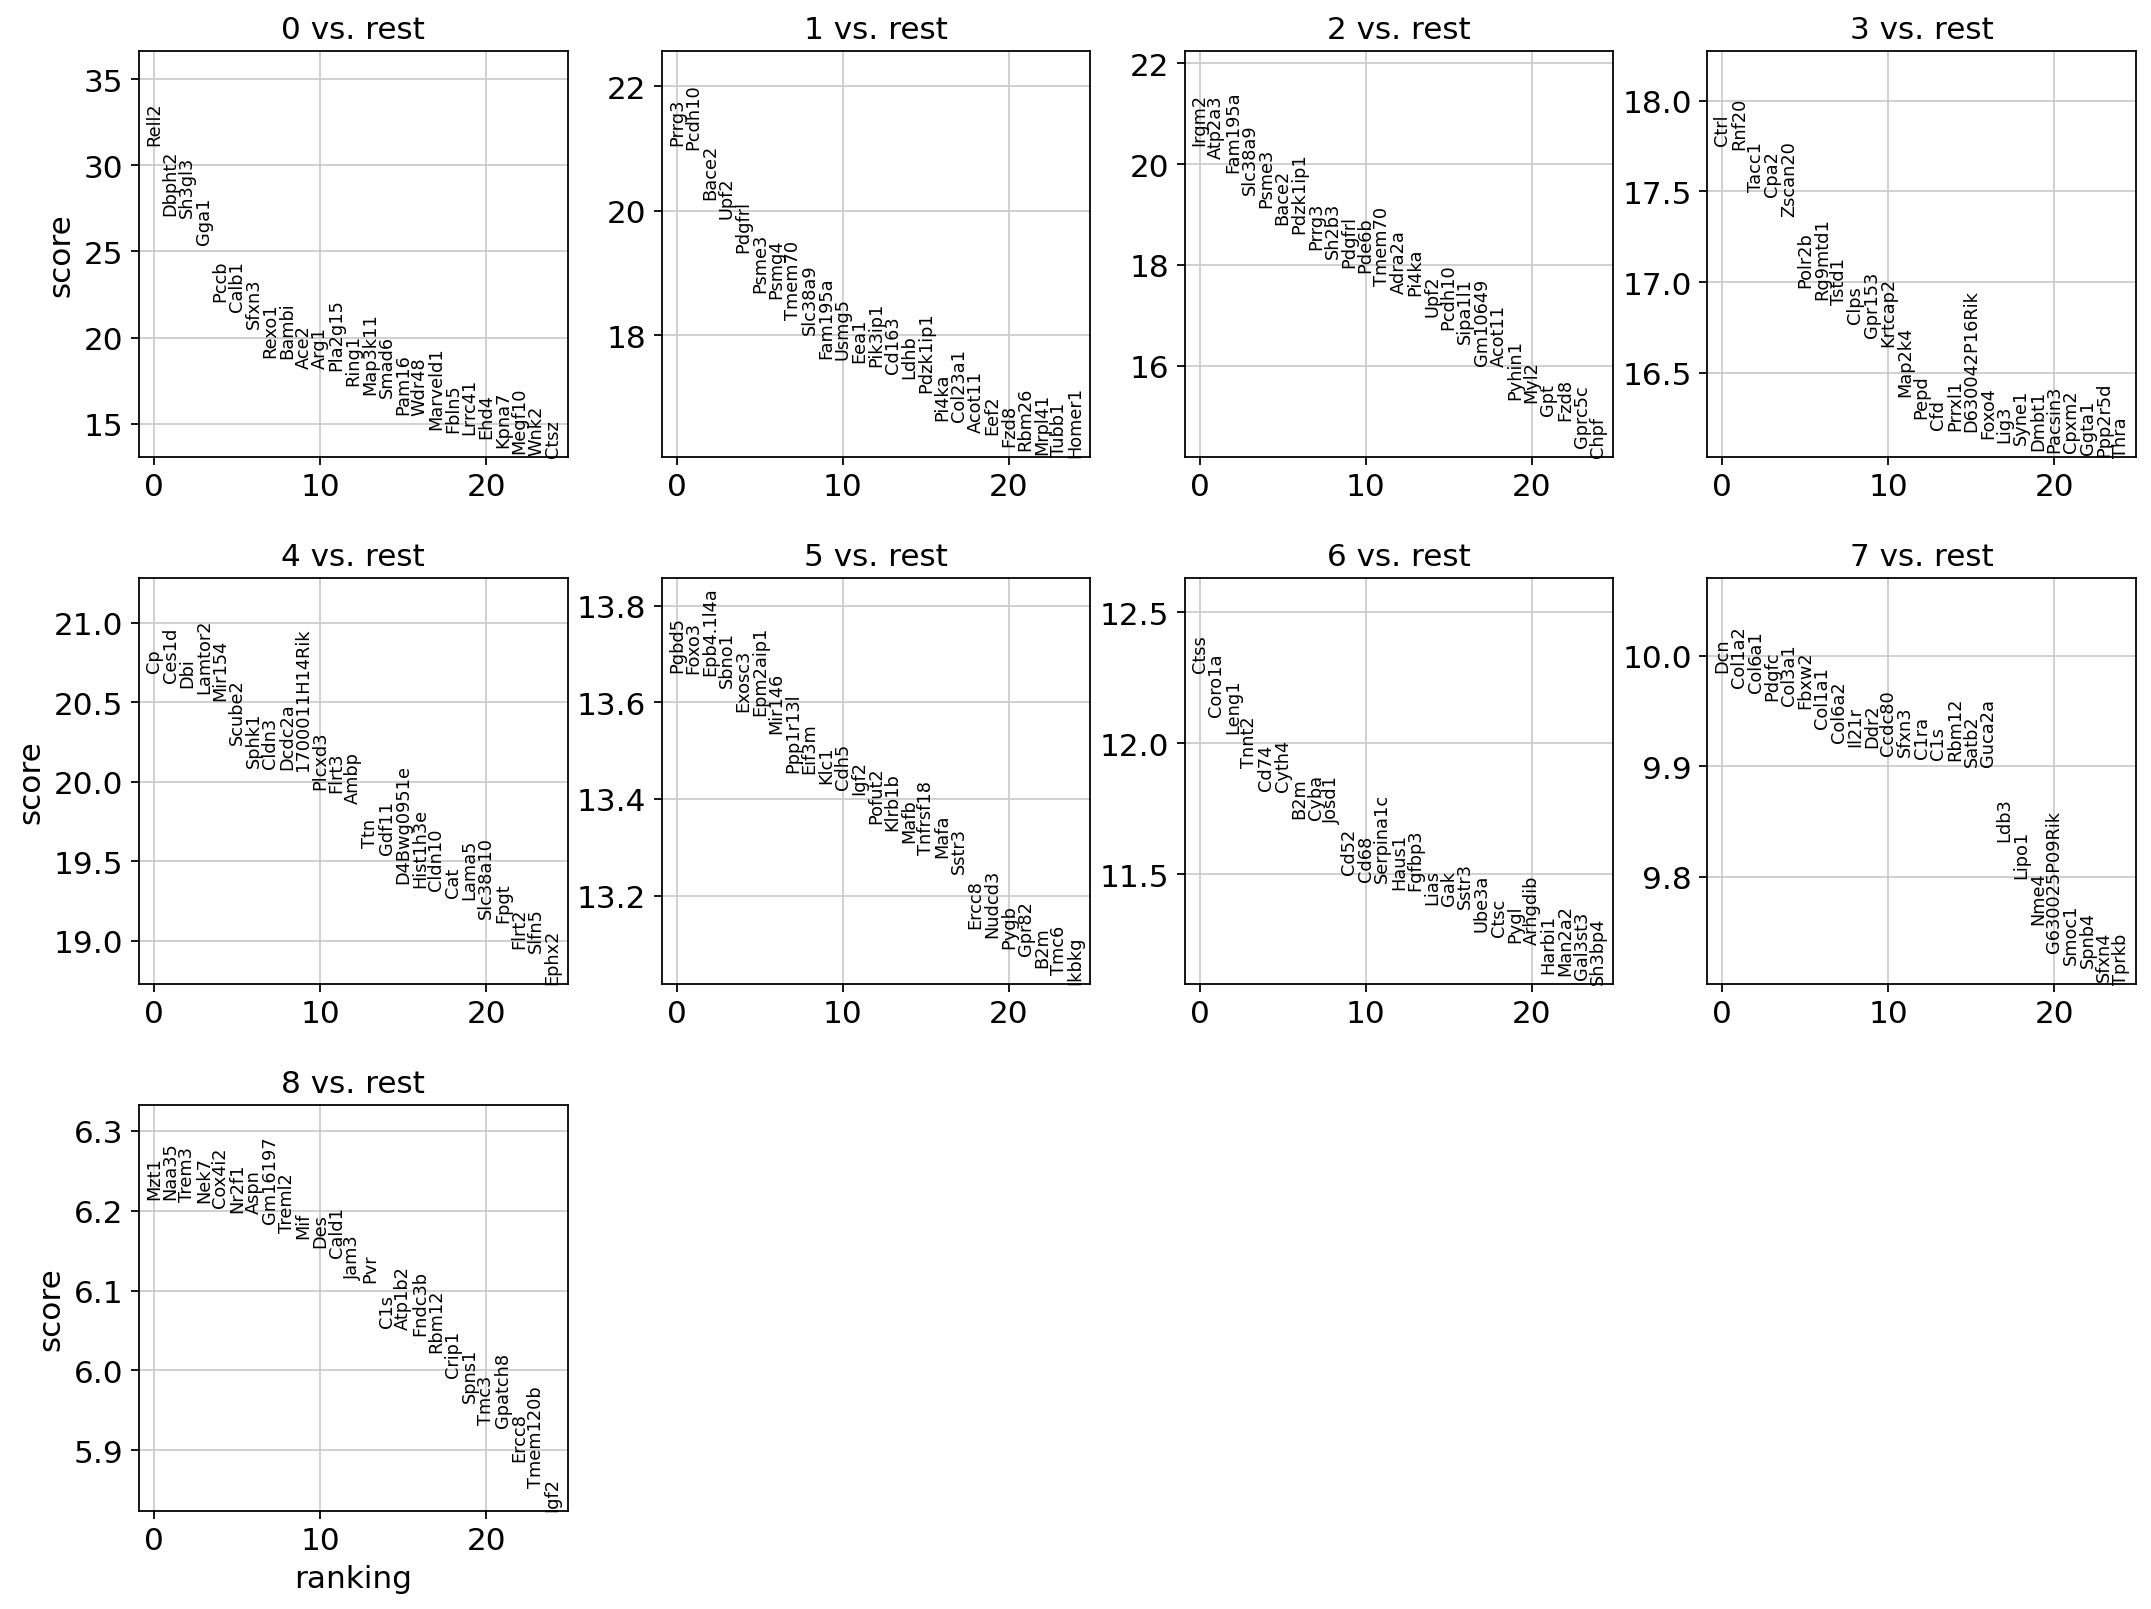

In [71]:
sc.tl.rank_genes_groups(pancreas_cluster ,'louvain', method='wilcoxon', bool = True, int=100) #find the marker genes using the method wilcoxon
sc.pl.rank_genes_groups(pancreas_cluster, n_genes=25, sharey=False)  #plot the marker genes 

In [72]:
pancreas_cluster.write('/content/drive/My Drive/Beta_Cell_Metabolism/Pancreas_Clustering/Pancreas_Wilcoxon.h5ad')#save the file containing the marker genes

In [73]:
pd.DataFrame(pancreas_cluster.uns['rank_genes_groups']['names']).head(5) #To view the first 5 rows of the dataframe of the marker genes 

,0,1,2,3,4,5,6,7,8
0,Rell2,Prrg3,Irgm2,Ctrl,Cp,Pgbd5,Ctss,Dcn,Mzt1
1,Dbpht2,Pcdh10,Atp2a3,Rnf20,Ces1d,Foxo3,Coro1a,Col1a2,Naa35
2,Sh3gl3,Bace2,Fam195a,Tacc1,Dbi,Epb4.1l4a,Leng1,Col6a1,Trem3
3,Gga1,Upf2,Slc38a9,Cpa2,Lamtor2,Sbno1,Tnnt2,Pdgfc,Nek7
4,Pccb,Pdgfrl,Psme3,Zscan20,Mir154,Exosc3,Cd74,Col3a1,Cox4i2


The top three highly expressed genes are not found here

**Visualisation of expression of the marker genes**
<br>
The marker genes will be more expressed in the clusters for which they are markers and we can see that through visualising them

In [74]:
pancreas_cluster = sc.read('/content/drive/My Drive/Beta_Cell_Metabolism/Pancreas_Clustering/Pancreas_Wilcoxon.h5ad') #read the file containing the marker genes

In [75]:
pancreas_cluster #To inspect general info about the normalized object B which has highly variable genes after PCA, UMAP, Leiden clustering, marker genes with wilcoxon

AnnData object with n_obs × n_vars = 1558 × 3827
    obs: 'cell', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'louvain'
    var: 'n_cells', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'hvg', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [76]:
marker_genes = ['Rell2',	'Prrg3',	'Irgm2',	'Ctrl',	'Cp',	'Pgbd5',	'Ctss',	'Dcn',	'Mzt1'] #Annotate the marker genes

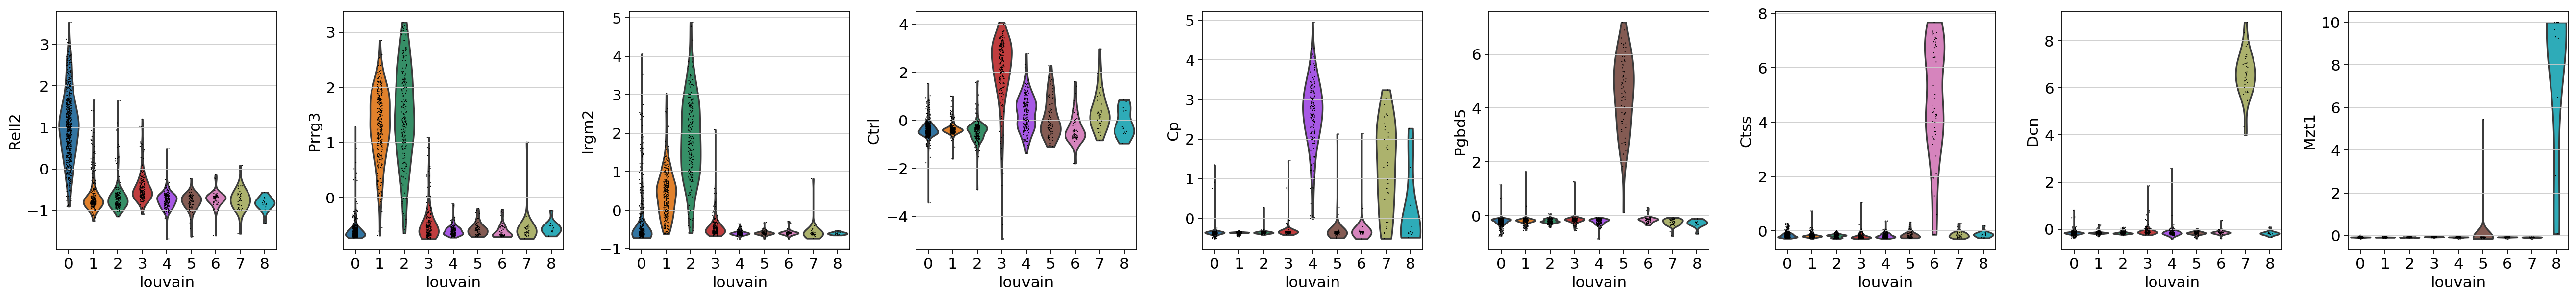

In [77]:
sc.pl.violin(pancreas_cluster, marker_genes, groupby='louvain') #To plot the expression of the highly expressed genes in different clusters in a violin plot

Highly expressed in cluster number 

Rell2	- 0

Prrg3	- 1,2

Irgm2	- 1,2

Ctrl - 3

Cp - 4

Pgbd5 - 5

Ctss - 6

Dcn	- 7

Mzt1 - 8

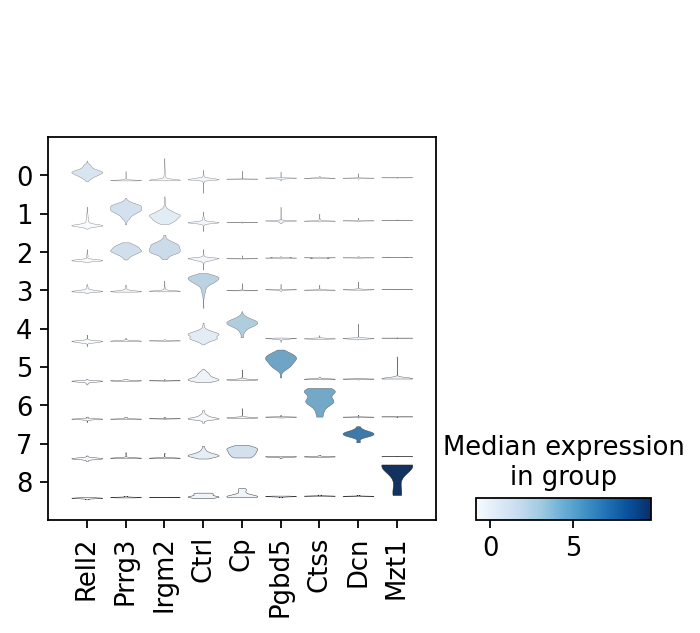

In [78]:
sc.pl.stacked_violin(pancreas_cluster, var_names =marker_genes, groupby='louvain', rotation=90);  #taking the marker genes from wilcoxon test and plotting against the clusters

Highly expressed in cluster number 

Rell2	- 0

Prrg3	- 1,2

Irgm2	- 1,2

Ctrl - 3

Cp - 4

Pgbd5 - 5

Ctss - 6

Dcn	- 7

Mzt1 - 8

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['louvain']"]`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain']`


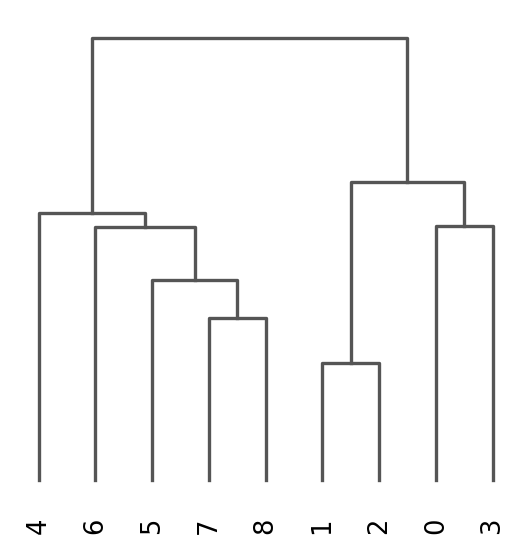

In [79]:
#computing the dendrogram to which clusters are similiar
sc.tl.dendrogram (pancreas_cluster,'louvain', n_pcs=50)
sc.pl.dendrogram(pancreas_cluster, 'louvain', show =True)

Related Clusters -

1 and 2

0 and 3

7 and 8 which is related to 5 which is related to 6 which is related to 4



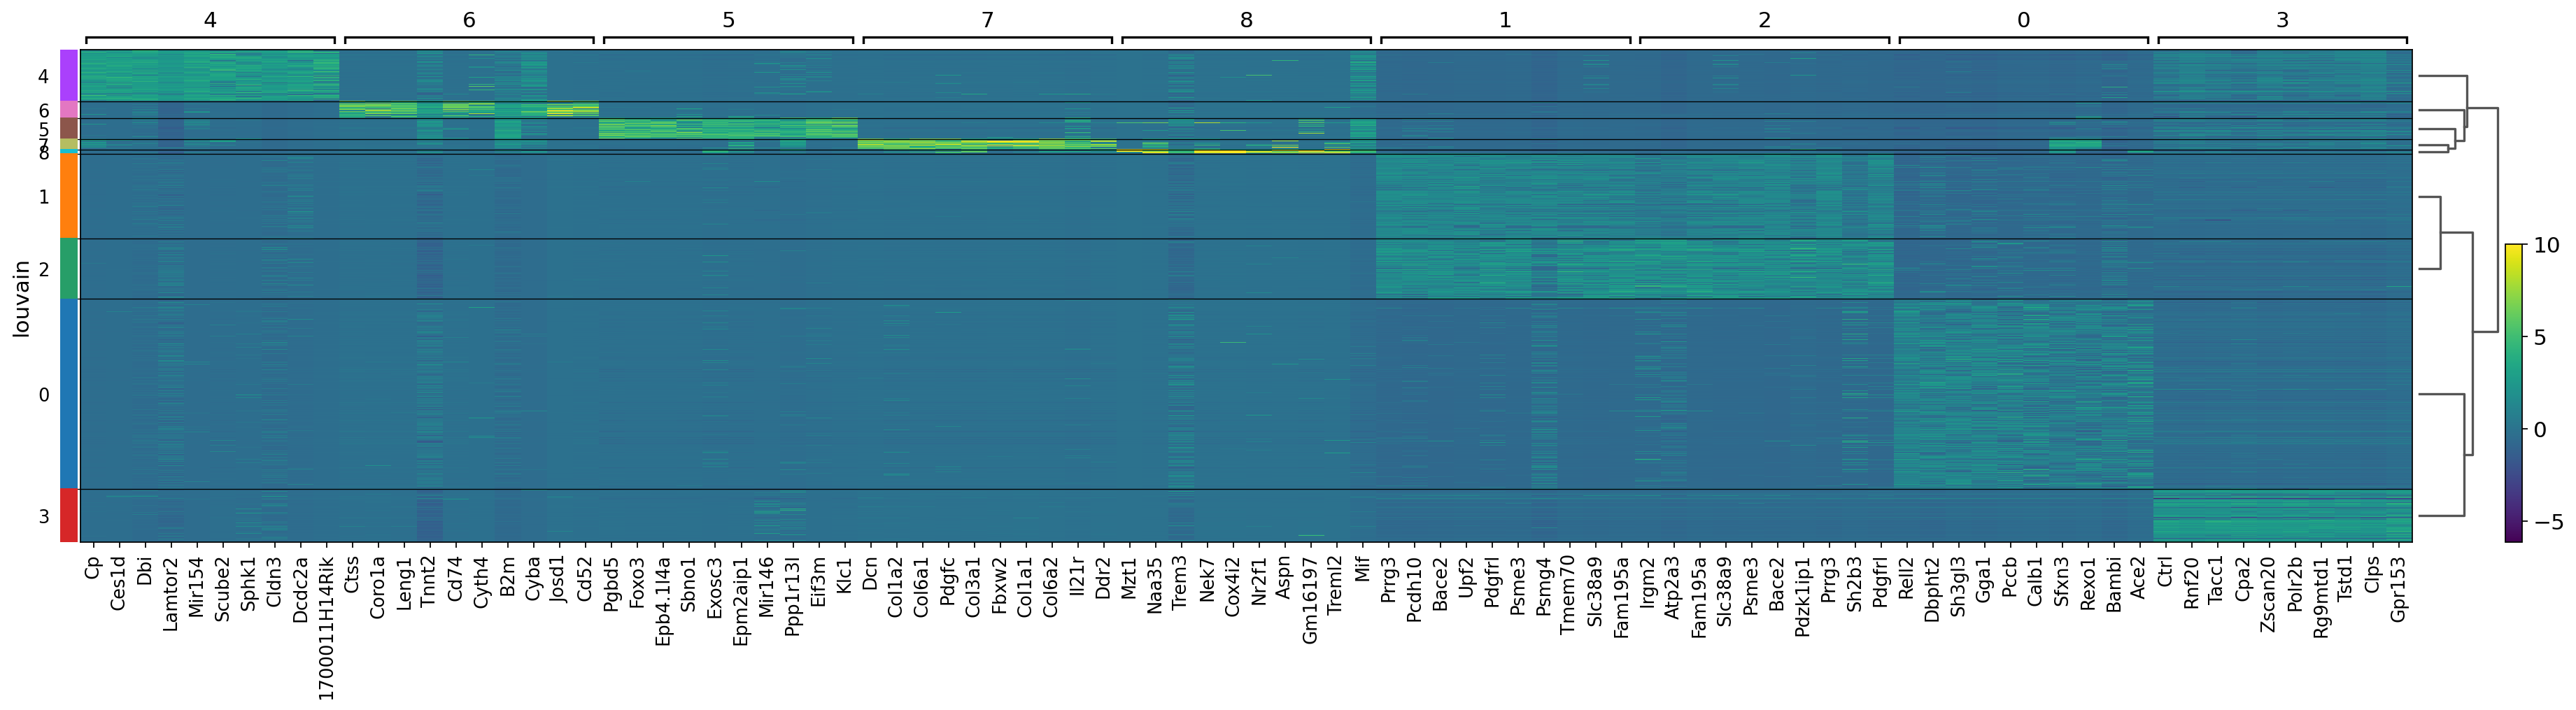

In [80]:
sc.pl.rank_genes_groups_heatmap(pancreas_cluster, n_genes=10, show_gene_labels=True ); #computing a heatmap of the gene expression of cells for top 20 marker genes

**Comparision of the marker genes between the clusters**

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


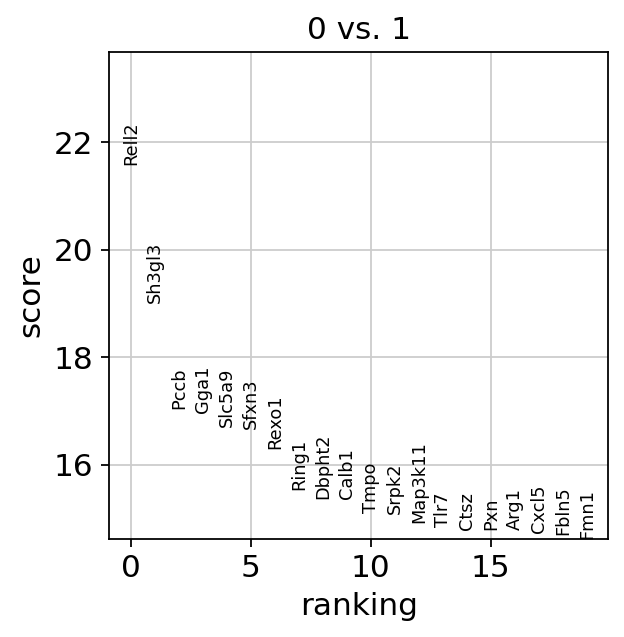

In [81]:
#computing the marker genes which can differentiate one cluster from one or many clusters
sc.tl.rank_genes_groups(pancreas_cluster, groupby='louvain',groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(pancreas_cluster,groups=['0'])

Rell2 is most the most differentially expressed gene between cells in cluster 0 and cells in cluster 1